/tmp/ipykernel_1612394/3935871903.py:38: RuntimeWarning: invalid value encountered in double_scalars
  ratio = s/math.sqrt(s+b)


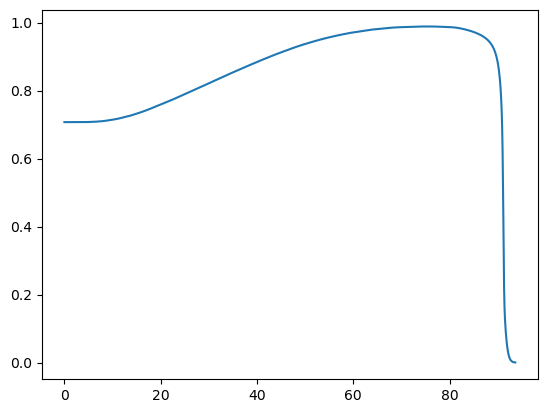

In [15]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math

f = uproot.open("tmp/output_xsec_example.root")
f.keys()

h = f['p8_ee_Zmumu_ecm91/m_inv;1'].to_hist()

x = h.axes[0].centers
y = h.values()

#yim,xim = im.to_numpy()
#plt.plot(xim[:-1],yim)

htau = f['p8_ee_Ztautau_ecm91/m_inv;1'].to_hist()

xtau = htau.axes[0].centers
ytau = htau.values()

#yimtau,ximtau = imtau.to_numpy()

newx = []
newy = []
result = []
norm = sum(y)
normtau = sum(ytau)

for i in x:
    s_ = h[i*1.0j:].sum()
    s = s_.value/norm
    b_ = htau[i*1.0j:].sum()
    b = b_.value/normtau
    ratio = s/math.sqrt(s+b)
    #newx.append(x[i])
    newy.append(ratio)
    result.append((i,ratio))

plt.plot(x,newy)

In [23]:
optmize = max(newy)
#index = result.index(optmize)
index = np.where(newy == optmize)
cut = x[index]

print(optmize)
print(cut)

0.9884002785421228
[75.3225]


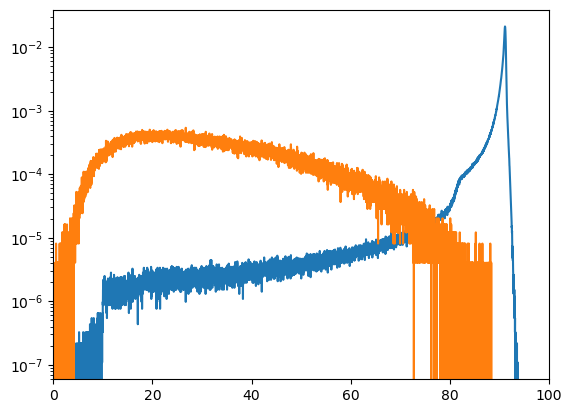

In [25]:
im = f['p8_ee_Zmumu_ecm91/m_inv;1']

yim,xim = im.to_numpy()

imtau = f['p8_ee_Ztautau_ecm91/m_inv;1']
yimtau,ximtau = imtau.to_numpy()

plt.plot(xim[:-1],yim/sum(yim), label = "Muon invariant mass")
plt.plot(ximtau[:-1],yimtau/sum(yimtau), label = "Tau invariant mass")
plt.xlim(0,100)
plt.yscale("log")